In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
data=pd.read_excel('Final_Train.xlsx')
data.head(15)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [3]:
data.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961,5961,2659,5936,5961,3341,5961.000000
unique,1420,64,51,877,6,2998,NaN
top,BDS,9 years experience,100%,"HSR Layout, Bangalore",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,NaN
freq,488,323,684,75,1397,40,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,307.944640
std,NaN,NaN,NaN,NaN,NaN,NaN,190.920373
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000


In [4]:
data['Place'].fillna('HSR Layout, Bangalore',inplace=True)

In [5]:
data['City'] = data['Place'].str.split(',').str[1]
data['Area'] = data['Place'].str.split(',').str[0]

In [6]:
data['City'].describe()

count           5960
unique             9
top        Bangalore
freq            1283
Name: City, dtype: object

In [7]:
data['Area'].describe()

count           5961
unique           866
top       HSR Layout
freq             100
Name: Area, dtype: object

In [8]:
data['1st_degree'] = data['Qualification'].str.split(',').str[0]
data['2nd_degree'] = data['Qualification'].str.split(',').str[1]
data['3rd_degree'] = data['Qualification'].str.split(',').str[2]
data['4th_degree'] = data['Qualification'].str.split(',').str[3]

In [9]:
data['1st_degree'].describe()

count     5961
unique     151
top       MBBS
freq      2448
Name: 1st_degree, dtype: object

In [10]:
data['2nd_degree'].describe()

count          3999
unique          426
top        MS - ENT
freq            301
Name: 2nd_degree, dtype: object

In [11]:
data['3rd_degree'].describe()

count                       1371
unique                       406
top        Venereology & Leprosy
freq                         185
Name: 3rd_degree, dtype: object

In [12]:
data['4th_degree'].describe()

count       376
unique      212
top        MBBS
freq         19
Name: 4th_degree, dtype: object

As we move up the string provided in the qualification column the count decreases and unique elements increase, so we stop at 4th degree.

In Miscellaneous_Info column some strings begin with rating percentage and the number of feedback that resulted that rating. Let us separate that out.

In [13]:
data['M_rating'] = data['Miscellaneous_Info'].str.split('%').str[0]

In [14]:
data['M_rating'].describe()

count     3341
unique    1557
top        100
freq       335
Name: M_rating, dtype: object

In [15]:
data['M_rating']

0                                                     100
1                                                      98
2                                                     NaN
3       Bannerghatta Road, Bangalore ₹250 Available on...
4                                                     100
                              ...                        
5956                                                   98
5957                                                  NaN
5958                                                   97
5959    General Medical Consultation Viral Fever Treat...
5960    Acrylic Partial Denture Crowns and Bridges Fix...
Name: M_rating, Length: 5961, dtype: object

In [16]:

data['M_rating_len'] = data['M_rating'].str.len()

data.loc[data['M_rating_len']>3, 'M_rating'] = 0

In [17]:
data['M_rating_len']

0        3.0
1        2.0
2        NaN
3       58.0
4        3.0
        ... 
5956     2.0
5957     NaN
5958     2.0
5959    79.0
5960    66.0
Name: M_rating_len, Length: 5961, dtype: float64

In [18]:
data['M_rating']

0       100
1        98
2       NaN
3         0
4       100
       ... 
5956     98
5957    NaN
5958     97
5959      0
5960      0
Name: M_rating, Length: 5961, dtype: object

In [22]:
type(data['M_rating'][2])

str

In [21]:
data['M_rating'].fillna('0',inplace=True)

In [23]:
data['M_number_of_feedback'] = data['Miscellaneous_Info'].str.split('% ').str[1]

In [24]:
data['M_number_of_feedback']

0                 16 Feedback Kakkanad, Ernakulam
1               76 Feedback Whitefield, Bangalore
2                                             NaN
3                                             NaN
4                4 Feedback Keelkattalai, Chennai
                          ...                    
5956          45 Feedback Basavanagudi, Bangalore
5957                                          NaN
5958    11 Feedback Greater Kailash Part 2, Delhi
5959                                          NaN
5960                                          NaN
Name: M_number_of_feedback, Length: 5961, dtype: object

We have to get only the first element of these strings

In [25]:
data['M_feedbacks_number'] = data['M_number_of_feedback'].str.split(' ').str[0]

In [26]:
data['M_feedbacks_number']

0        16
1        76
2       NaN
3       NaN
4         4
       ... 
5956     45
5957    NaN
5958     11
5959    NaN
5960    NaN
Name: M_feedbacks_number, Length: 5961, dtype: object

In [27]:
data['M_feedbacks_number'].fillna('0',inplace = True)

In [62]:
type(data['M_feedbacks_number'][2])

str

In [ ]:
data.tail(15)

As we can see the rest of Miscellaneous_Info is either the address, which already we have in other columns, or the target variable itself.

In [ ]:
data.columns

In [ ]:
Data=data[['Experience', 'Rating', 'Place', 'Profile', 'Fees', 'City', 'Area', '1st_degree','2nd_degree', '3rd_degree', '4th_degree', 'M_rating', 'M_feedbacks_number']]

In [ ]:
Data.describe(include='all')

In [ ]:
sns.set()

In [28]:
data['Rating'] = data['Rating'].str.split('%').str[0]

In [29]:
data['Rating'].fillna('0',inplace=True)

In [30]:
data['Rating'].describe()

count     5961
unique      52
top          0
freq      3302
Name: Rating, dtype: object

In [31]:
data['Experience'] = data['Experience'].str.split(' ').str[0]

In [32]:
data['Experience'].describe()

count     5961
unique      64
top          9
freq       323
Name: Experience, dtype: object

In [33]:
data['Experience']=[int(i) for i in data['Experience']]

In [34]:
data['Experience'].describe()

count    5961.000000
mean       17.303976
std        11.142798
min         0.000000
25%         9.000000
50%        14.000000
75%        23.000000
max        66.000000
Name: Experience, dtype: float64

In [35]:
data['Rating']=[int(i) for i in data['Rating']]

In [36]:
data['Rating'].describe()

count    5961.000000
mean       42.217245
std        47.340934
min         0.000000
25%         0.000000
50%         0.000000
75%        96.000000
max       100.000000
Name: Rating, dtype: float64

In [37]:
data['City'].fillna("XXX",inplace = True)
data['Area'].fillna("XXX",inplace = True)
data['4th_degree'].fillna("XXX",inplace = True)
data['Profile'].fillna("XXX",inplace = True)
data['1st_degree'].fillna("XXX",inplace = True)
data['2nd_degree'].fillna("XXX",inplace = True)
data['3rd_degree'].fillna("XXX",inplace = True)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [68]:
data['En_city']=le.fit_transform(data['City'])

In [69]:
le_area=LabelEncoder()
data['En_area']=le_area.fit_transform(data['Area'])

In [70]:
le_profile=LabelEncoder()
data['Profile']=le_area.fit_transform(data['Profile'])

In [42]:
le_1st=LabelEncoder()
data['1st_degree']=le_area.fit_transform(data['1st_degree'])

In [43]:
le_2nd=LabelEncoder()
data['2nd_degree']=le_2nd.fit_transform(data['2nd_degree'])

In [44]:
le_3rd=LabelEncoder()
data['3rd_degree']=le_3rd.fit_transform(data['3rd_degree'])

In [45]:
le_4th=LabelEncoder()
data['4th_degree']=le_4th.fit_transform(data['4th_degree'])

In [46]:
data.describe(include='all')

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Area,1st_degree,2nd_degree,3rd_degree,4th_degree,M_rating,M_rating_len,M_number_of_feedback,M_feedbacks_number,En_city,En_area
count,5961,5961.000000,5961.000000,5961,5961.000000,3341,5961.000000,5961,5961,5961.000000,5961.000000,5961.000000,5961.000000,5961,3341.000000,1507,5961,5961.000000,5961.000000
unique,1420,NaN,NaN,877,NaN,2998,NaN,10,866,NaN,NaN,NaN,NaN,51,NaN,1420,210,NaN,NaN
top,BDS,NaN,NaN,"HSR Layout, Bangalore",NaN,Acrylic Partial Denture Crowns and Bridges Fix...,NaN,Bangalore,HSR Layout,NaN,NaN,NaN,NaN,0,NaN,"2 Feedback Borivali West, Mumbai",0,NaN,NaN
freq,488,NaN,NaN,100,NaN,40,NaN,1283,100,NaN,NaN,NaN,NaN,2620,NaN,3,4454,NaN,NaN
mean,NaN,17.303976,42.217245,NaN,2.441872,NaN,307.944640,NaN,NaN,47.962087,288.075323,362.796175,204.727395,NaN,35.290332,NaN,NaN,3.061231,410.120282
std,NaN,11.142798,47.340934,NaN,1.658014,NaN,190.920373,NaN,NaN,39.371696,131.765907,99.497639,28.520633,NaN,32.255791,NaN,NaN,2.328070,255.174855
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,5.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000
25%,NaN,9.000000,0.000000,NaN,1.000000,NaN,150.000000,NaN,NaN,6.000000,227.000000,406.000000,211.000000,NaN,2.000000,NaN,NaN,1.000000,195.000000
50%,NaN,14.000000,0.000000,NaN,2.000000,NaN,300.000000,NaN,NaN,79.000000,293.000000,406.000000,211.000000,NaN,39.000000,NaN,NaN,3.000000,404.000000
75%,NaN,23.000000,96.000000,NaN,4.000000,NaN,500.000000,NaN,NaN,79.000000,426.000000,406.000000,211.000000,NaN,64.000000,NaN,NaN,5.000000,622.000000


In [92]:
j=0
for i in data['M_rating']:
    x=int(i)
    data['M_rating'][j]=x
    j=j+1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [94]:
type(data['M_rating'][0])

int

In [96]:
data['M_rating'].describe()

count     5961
unique      50
top          0
freq      4458
Name: M_rating, dtype: int64

In [63]:
le_4th=LabelEncoder()
data['M_feedbacks_number']=le_4th.fit_transform(data['M_feedbacks_number'])

In [57]:
data['M_rating'].isnull().sum()

0

In [50]:
type(data['M_rating'][2])

str

In [55]:
k=[i (if type(i)=='str') for i in data['M_rating']]

SyntaxError: invalid syntax (<ipython-input-55-842a75c00323>, line 1)

In [75]:
Data=data[['Experience', 'Rating', 'Profile', 'Fees', 'En_city', 'En_area', '1st_degree','2nd_degree', '3rd_degree', '4th_degree', 'M_feedbacks_number']]

In [76]:
Data.describe(include='all')

,Experience,Rating,Profile,Fees,En_city,En_area,1st_degree,2nd_degree,3rd_degree,4th_degree,M_feedbacks_number
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,2.441872,307.944640,3.061231,410.120282,47.962087,288.075323,362.796175,204.727395,26.498574
std,11.142798,47.340934,1.658014,190.920373,2.328070,255.174855,39.371696,131.765907,99.497639,28.520633,53.154372
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.000000,1.000000,150.000000,1.000000,195.000000,6.000000,227.000000,406.000000,211.000000,1.000000
50%,14.000000,0.000000,2.000000,300.000000,3.000000,404.000000,79.000000,293.000000,406.000000,211.000000,1.000000
75%,23.000000,96.000000,4.000000,500.000000,5.000000,622.000000,79.000000,426.000000,406.000000,211.000000,2.000000
max,66.000000,100.000000,5.000000,950.000000,9.000000,865.000000,150.000000,426.000000,406.000000,212.000000,209.000000


In [77]:
y=Data['Fees']
x=Data.drop('Fees',axis=1)

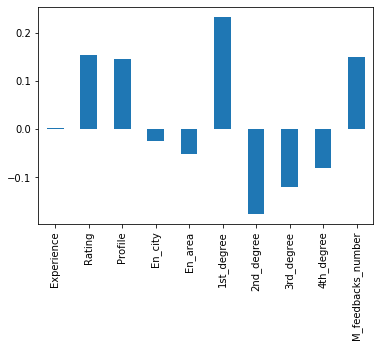

In [78]:
Data.drop('Fees',axis=1).corrwith(Data['Fees']).plot(kind='bar')
plt.show()

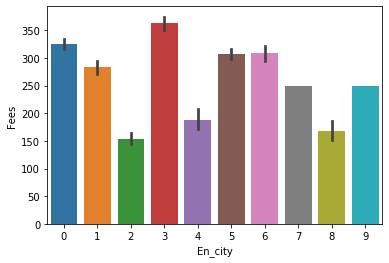

In [96]:
sns.barplot(Data['En_city'],Data['Fees'])
plt.show()

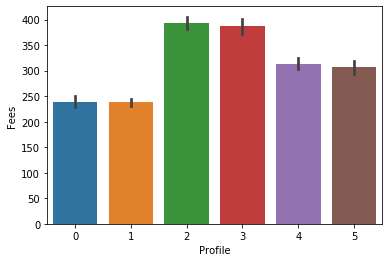

In [97]:
sns.barplot(Data['Profile'],Data['Fees'])
plt.show()

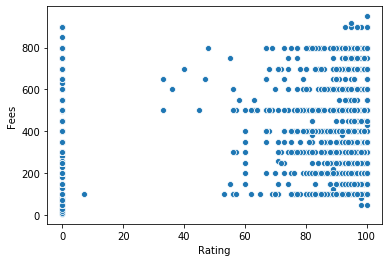

In [99]:
sns.scatterplot(Data['Rating'],Data['Fees'])
plt.show()

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures()
X=poly.fit_transform(x)

In [80]:
x

,Experience,Rating,Profile,En_city,En_area,1st_degree,2nd_degree,3rd_degree,4th_degree,M_feedbacks_number
0,24,100,5,4,296,8,252,406,211,52
1,12,98,0,0,855,5,241,406,211,182
2,9,0,3,0,452,79,334,406,211,1
3,12,0,0,0,68,12,7,406,211,1
4,20,100,0,1,335,5,426,406,211,131
...,...,...,...,...,...,...,...,...,...,...
5956,19,98,3,0,70,79,328,406,211,140
5957,33,0,4,1,535,79,426,406,211,1
5958,41,97,4,3,215,79,426,406,211,13
5959,15,90,4,6,840,79,249,406,211,1


In [83]:
X.shape

(5961, 66)

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
ss=StandardScaler()

In [85]:
x=ss.fit_transform(X)
y=scale(y)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(49,7),max_iter=1000)
lr=LinearRegression()
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
svr=SVR()

In [93]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
models=[lr,tree,knr,nn,svr,rf]
for model in models:
    pipeline=Pipeline([('model',model)])
    model.fit(X_train,y_train)
    print('---'*30,'\n',model,'\n','---'*30)
    #print(model.score(X_test,y_test))
    print(mean_squared_error(model.predict(X_test),y_test))
    #print(classification_report(model.predict(X_test),y_test))

------------------------------------------------------------------------------------------ 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 
 ------------------------------------------------------------------------------------------
0.913491355700642
------------------------------------------------------------------------------------------ 
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 
 ------------------------------------------------------------------------------------------
1.5121483413053245
------------------------------------------------------------------------------------------ 
 KNeighborsRegress

In [103]:
data=pd.read_excel('Final_Test.xlsx')
data['Place'].fillna('HSR Layout, Bangalore',inplace=True)
data['City'] = data['Place'].str.split(',').str[1]
data['Area'] = data['Place'].str.split(',').str[0]
data['1st_degree'] = data['Qualification'].str.split(',').str[0]
data['2nd_degree'] = data['Qualification'].str.split(',').str[1]
data['3rd_degree'] = data['Qualification'].str.split(',').str[2]
data['4th_degree'] = data['Qualification'].str.split(',').str[3]
data['M_number_of_feedback'] = data['Miscellaneous_Info'].str.split('% ').str[1]
data['M_feedbacks_number'] = data['M_number_of_feedback'].str.split(' ').str[0]
data['M_feedbacks_number'].fillna('0',inplace = True)
Data=data[['Experience', 'Rating', 'Place', 'Profile', 'City', 'Area', '1st_degree','2nd_degree', '3rd_degree', '4th_degree', 'M_feedbacks_number']]
data['Rating'] = data['Rating'].str.split('%').str[0]
data['Rating'].fillna('0',inplace=True)
data['Experience'] = data['Experience'].str.split(' ').str[0]
data['Experience']=[int(i) for i in data['Experience']]
data['Rating']=[int(i) for i in data['Rating']]
data['City'].fillna("XXX",inplace = True)
data['Area'].fillna("XXX",inplace = True)
data['4th_degree'].fillna("XXX",inplace = True)
data['Profile'].fillna("XXX",inplace = True)
data['1st_degree'].fillna("XXX",inplace = True)
data['2nd_degree'].fillna("XXX",inplace = True)
data['3rd_degree'].fillna("XXX",inplace = True)
le=LabelEncoder()
data['En_city']=le.fit_transform(data['City'])
le_area=LabelEncoder()
data['En_area']=le_area.fit_transform(data['Area'])
le_profile=LabelEncoder()
data['Profile']=le_area.fit_transform(data['Profile'])
le_1st=LabelEncoder()
data['1st_degree']=le_area.fit_transform(data['1st_degree'])
le_2nd=LabelEncoder()
data['2nd_degree']=le_2nd.fit_transform(data['2nd_degree'])
le_3rd=LabelEncoder()
data['3rd_degree']=le_3rd.fit_transform(data['3rd_degree'])
le_4th=LabelEncoder()
data['4th_degree']=le_4th.fit_transform(data['4th_degree'])
le_4th=LabelEncoder()
data['M_feedbacks_number']=le_4th.fit_transform(data['M_feedbacks_number'])
Data=data[['Experience', 'Rating', 'Profile', 'En_city', 'En_area', '1st_degree','2nd_degree', '3rd_degree', '4th_degree', 'M_feedbacks_number']]
poly=PolynomialFeatures()
X=poly.fit_transform(Data)

As the lowest rmse score was from the last model so the variable model should hold random forest regressor

In [106]:
pred=model.predict(X)

In [109]:
pd.read_excel('Final_Train.xlsx')['Fees'].std()

190.92037314305324

In [110]:
pd.read_excel('Final_Train.xlsx')['Fees'].mean()

307.9446401610468

In [111]:
pred=pred*190.920+307.94

In [112]:
pred

array([322.49655242, 322.49655242, 444.00650747, ..., 322.49655242,
       376.00093592, 320.49638856])

In [113]:
from sklearn.externals import joblib
joblib.dump(model,'doctor_fees.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['doctor_fees.pkl']

In [115]:
output=pd.DataFrame(pred)
output.to_csv('fees_prediction.csv')